In [1]:
import pandas as pd
glutenfree=pd.read_csv("glutenfree.csv")
glutenfree

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,year,month
0,Kowloon Bay Gluten Free IPA,436710,Kowloon Bay Brewery,25260,India Pale Ale (IPA),6.6,1469527200,CacheManyHose,282160,3,7,2,6,14,3.2,Drank at Home: Eat To Live cafe. Floral hop n...,2016,7
1,Glutenberg 1er Anniversaire,182791,Glutenberg Brewing Company,13241,Specialty Grain,7.5,1373796000,BiereLuc,131174,3,7,3,8,16,3.7,BiÃ¨re cuivrÃ©e. Nez houblon-caramel. En bouc...,2013,7
2,Glutenberg 1er Anniversaire,182791,Glutenberg Brewing Company,13241,Specialty Grain,7.5,1368525600,lesifflebiere,237596,4,8,4,7,15,3.8,Une belle brune qui dÃ©gage immÃ©diatement de...,2013,5
3,Glutenberg 1er Anniversaire,182791,Glutenberg Brewing Company,13241,Specialty Grain,7.5,1361790000,Viper666,22083,3,7,3,7,13,3.3,Bouteille 750ml. De couleur ambrÃ©e foncÃ©e e...,2013,2
4,Glutenberg 1er Anniversaire,182791,Glutenberg Brewing Company,13241,Specialty Grain,7.5,1360580400,czar,104498,3,6,3,6,14,3.2,pours clear medium dark golden with a decent ...,2013,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,Grain dOrge Glutenfri Ekologisk Lager,477827,Grain dOrge (Brasseurs De Gayant),759,Pale Lager,3.5,1492164000,gnoff,32615,2,6,2,6,11,2.7,"25 cl bottle from Copp Avenyn, GÃ¶teborg. Sam...",2017,4
3766,Grain dOrge Glutenfri Ekologisk Lager,477827,Grain dOrge (Brasseurs De Gayant),759,Pale Lager,3.5,1489489200,Turtles,333213,2,4,2,4,9,2.1,"250ml bottle. Clear pale golden, medium size ...",2017,3
3767,Grain dOrge Glutenfri Ekologisk Lager,477827,Grain dOrge (Brasseurs De Gayant),759,Pale Lager,3.5,1487502000,SamTheBarrel,269531,3,6,3,6,8,2.6,250ml green bottle poured into a lager glass....,2017,2
3768,Grain dOrge Glutenfri Ekologisk Lager,477827,Grain dOrge (Brasseurs De Gayant),759,Pale Lager,3.5,1483786800,Malin_aiisa,361626,2,6,3,5,11,2.7,"Bottle. Pours clear amber, no head. Aroma mal...",2017,1


## Temporal analysis of glutenfree beers

In [2]:
number_rating=glutenfree.groupby('year')['beer_name'].count()
number_rating

year
2006      3
2007      8
2008     32
2009     45
2010     50
2011     84
2012    379
2013    548
2014    687
2015    702
2016    791
2017    441
Name: beer_name, dtype: int64

<BarContainer object of 12 artists>

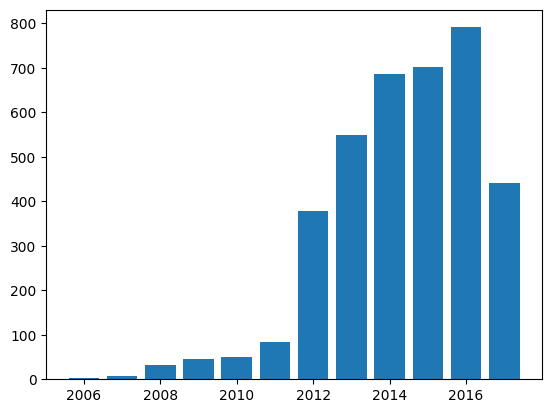

In [3]:
import matplotlib.pyplot as plt
plt.bar(number_rating.index, number_rating)

### What is the evolution of the popularity of the site?

In [6]:
with open('ratings.txt', 'r') as file:
    dates=[line.strip().split(':', 1)[1] for i,line in enumerate(file) if i % 17 ==6]
    

In [7]:
import datetime
import matplotlib.pyplot as plt

In [8]:
dates=[int(date) if not pd.isna(date) else None for date in dates]
readable_dates = []
for timestamp in dates:

    if pd.isna(timestamp):
        readable_dates.append(None)
    else:
        readable_dates.append(datetime.datetime.fromtimestamp(timestamp))

year = [time.year if not pd.isna(time) else 'NaN' for time in readable_dates]
month = [time.month if not pd.isna(time) else 'NaN' for time in readable_dates]


In [9]:
from collections import Counter
counts=Counter(year)
counts

Counter({2015: 842672,
         2014: 814683,
         2016: 813569,
         2013: 703815,
         2012: 580999,
         2017: 485109,
         2011: 458162,
         2009: 404951,
         2008: 400291,
         2010: 397754,
         2007: 357234,
         2006: 264000,
         2005: 219132,
         2004: 166266,
         2003: 113425,
         2002: 78746,
         2001: 18572,
         2000: 2694})

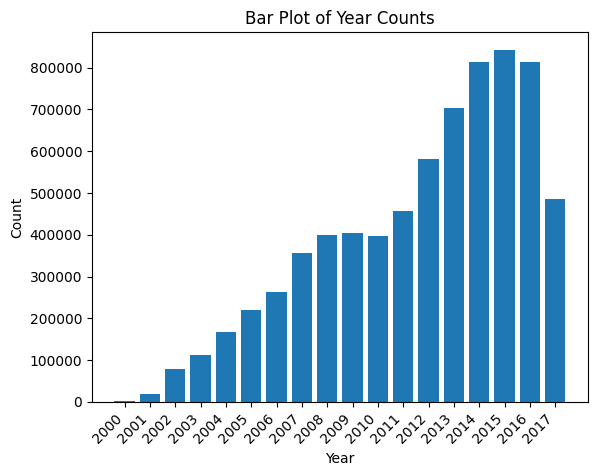

In [10]:
years = list(counts.keys())
counts_values = list(counts.values())

plt.bar(years, counts_values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Bar Plot of Year Counts')

# Manually set the x-axis ticks and labels
plt.xticks(years, rotation=45, ha="right")  

plt.show()

In [11]:
proportion_glutenfree=number_rating/years[:12]
proportion_glutenfree

year
2006    0.001488
2007    0.003966
2008    0.015881
2009    0.022344
2010    0.024839
2011    0.041812
2012    0.188370
2013    0.272908
2014    0.342814
2015    0.349080
2016    0.393532
2017    0.219731
Name: beer_name, dtype: float64

Text(0.5, 1.0, 'Evolution of the proportion of ratings on glutenfree beers')

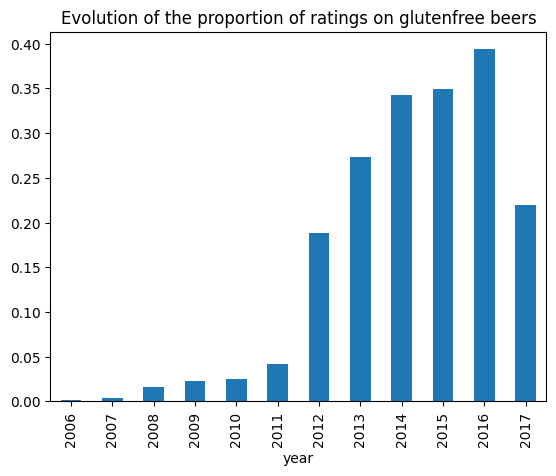

In [14]:
proportion_glutenfree.plot(kind='bar')
plt.title('Evolution of the proportion of ratings on glutenfree beers')

In [15]:
year_mean=glutenfree[['rating','year', 'appearance','aroma','palate','taste','overall']].groupby('year').mean()
year_std=glutenfree[['rating','year', 'appearance','aroma','palate','taste','overall']].groupby('year').std()
year_sem=glutenfree[['rating','year', 'appearance','aroma','palate','taste','overall']].groupby('year').sem()
year_mean

,rating,appearance,aroma,palate,taste,overall
year,,,,,,
2006,2.333333,3.333333,3.666667,2.000000,4.666667,9.666667
2007,2.250000,2.750000,4.750000,2.125000,4.250000,8.625000
2008,2.403125,2.562500,4.937500,2.562500,4.656250,9.312500
2009,1.993333,2.333333,3.955556,2.288889,3.844444,7.511111
2010,2.400000,2.820000,5.000000,2.520000,4.620000,9.040000
2011,2.241667,2.523810,4.500000,2.428571,4.297619,8.666667
2012,2.775726,2.965699,5.387863,2.857520,5.432718,11.113456
2013,2.852190,3.036496,5.669708,2.844891,5.611314,11.359489
2014,2.778020,3.004367,5.491994,2.909753,5.426492,10.947598


In [16]:
#We choose to keep only data after 2010, because before 2010, we have not enough data to do statistics
after_2010_mean=year_mean[year_mean.index>=2010]
after_2010_std=year_std[year_std.index>=2010]
after_2010_sem=year_sem[year_sem.index>=2010]


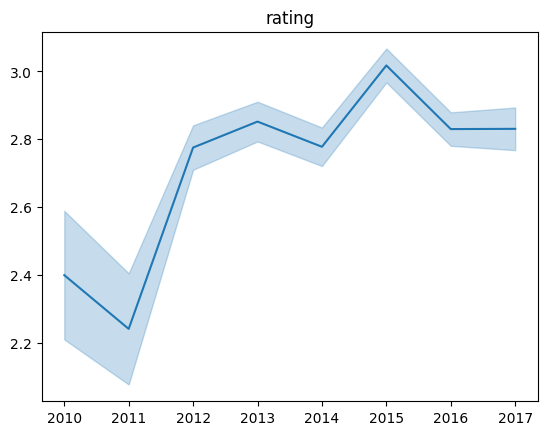

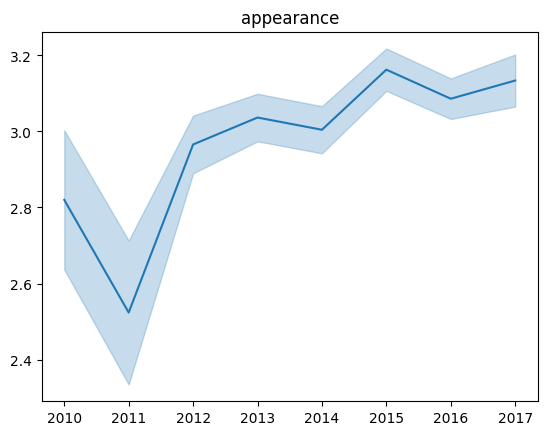

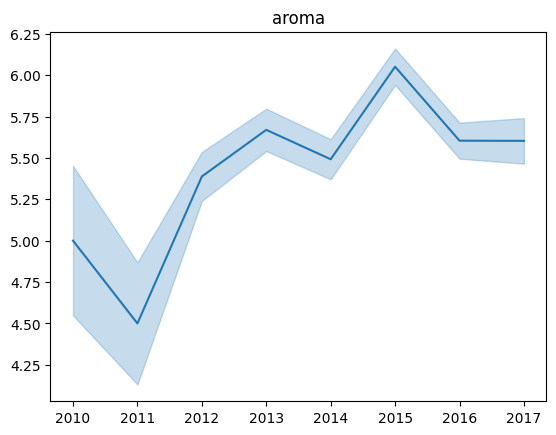

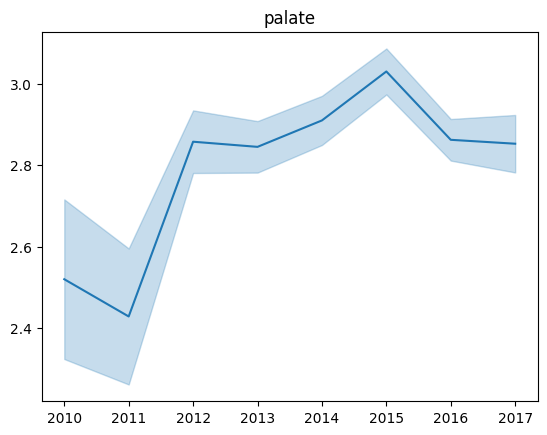

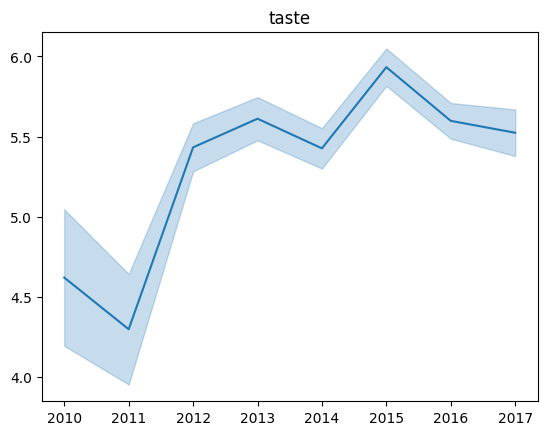

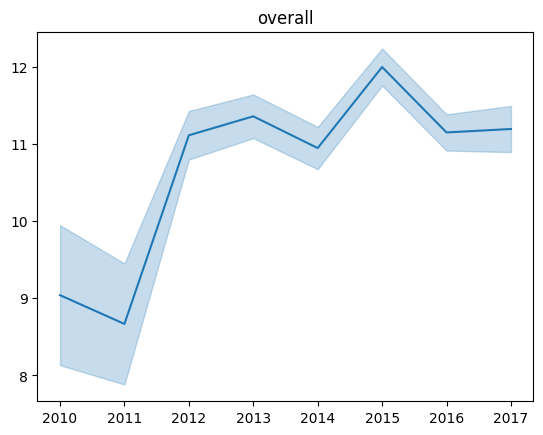

In [17]:
import matplotlib.pyplot as plt
for item in after_2010_mean.columns:
    plt.plot(after_2010_mean.index, after_2010_mean[item])
    plt.fill_between(after_2010_mean.index, after_2010_mean[item] - 1.96 * after_2010_sem[item], 
                         after_2010_mean[item] + 1.96 *after_2010_sem[item], alpha=0.25
                         , color="tab:blue")
    plt.title(item)
    plt.show()

In [18]:
month_mean=glutenfree[['rating','month', 'appearance','aroma','palate','taste','overall']].groupby('month').mean()
month_mean

,rating,appearance,aroma,palate,taste,overall
month,,,,,,
1,2.797554,3.073394,5.501529,2.911315,5.489297,11.000000
2,2.888848,3.078067,5.661710,2.907063,5.639405,11.602230
3,2.846939,3.020408,5.699708,2.842566,5.577259,11.329446
4,2.825672,3.068657,5.611940,2.871642,5.543284,11.161194
5,2.797281,3.036254,5.537764,2.818731,5.492447,11.087613
6,2.772316,3.033898,5.604520,2.858757,5.420904,10.805085
7,2.853463,3.069252,5.603878,2.880886,5.623269,11.357341
8,2.836196,3.021472,5.631902,2.871166,5.610429,11.226994
9,2.774915,2.993220,5.528814,2.827119,5.403390,10.996610


## Spatial analysis of glutenfree beers

In [19]:
gluten_users=glutenfree['user_id']
users=pd.read_csv('users.csv')
subset=users[['user_id','location']]
subset.set_index('user_id', inplace=True)
locations=subset.loc[gluten_users]
locations

,location
user_id,
282160,Hong Kong
131174,Canada
237596,Canada
22083,Canada
104498,Canada
...,...
32615,Sweden
333213,Sweden
269531,Sweden


In [20]:
count=locations.groupby('location')['location'].count().sort_values(ascending=False)
count

location
Canada                    799
Denmark                   409
Norway                    223
Netherlands               139
Germany                   117
                         ... 
United States, Alaska       1
United States, Hawaii       1
United States, Montana      1
Venezuela                   1
Wales                       1
Name: location, Length: 96, dtype: int64

In [21]:
gluten_breweries=glutenfree['brewery_id']
breweries=pd.read_csv('breweries.csv')
glu_brew=breweries[breweries['id'].isin(gluten_breweries)]
glu_brew

,id,location,name,nbr_beers
345,25260,Hong Kong,Kowloon Bay Brewery,9
1070,13241,Canada,Glutenberg Brewing Company,42
1258,10231,Canada,Drummond Brewing Company / Something Brewing,9
1278,17638,Canada,Minhas Micro Brewery - Calgary,24
1470,11656,Canada,Whistler Brewing Company,32
...,...,...,...,...
22785,12283,Belgium,Caulier Developpement (La Maison Caulier),16
23198,15026,France,Brasserie de Vézelay,16
23255,29110,France,Brasserie Goudale (Saint-Omer),4
23350,739,France,Castelain,50


In [22]:
count_breweries=glu_brew.groupby('location')['location'].count().sort_values(ascending=False)
count_breweries

location
Spain                           11
Denmark                          8
United States, Colorado          7
Canada                           7
United States, Michigan          7
England                          7
Poland                           5
Germany                          5
Norway                           5
United States, Oregon            4
Australia                        4
France                           4
Belgium                          4
United States, Pennsylvania      3
United States, Utah              3
United States, Virginia          3
Sweden                           3
United States, Illinois          3
Italy                            3
United States, Florida           2
United States, New York          2
United States, Nevada            2
United States, Iowa              2
United States, California        2
United States, Wisconsin         2
Scotland                         2
New Zealand                      2
Czech Republic                   2
Austria    

In [23]:
glutenfree['user_location']=locations.reset_index(drop=True)

## Evolution of the number of ratings of glutenfree beers in function of the location

In [24]:
united_states=glutenfree[glutenfree['user_location'].str.contains('United States',case=False, na=False)]
european_countries = ['France', 'Germany', 'Italy', 'Spain', 'United Kingdom', 'Sweden', 'Norway', 'Denmark']

europe= glutenfree[glutenfree['user_location'].isin(european_countries)]

canada=glutenfree[glutenfree['user_location']=="Canada"]


In [25]:
uni=united_states.groupby('year')['beer_name'].count()
eur=europe.groupby('year')['beer_name'].count()
can=canada.groupby('year')['beer_name'].count()

<BarContainer object of 8 artists>

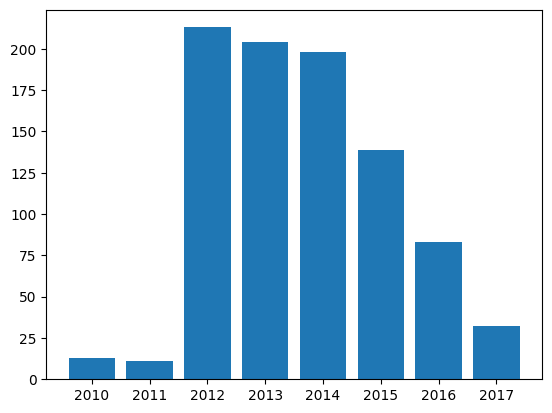

In [26]:
plt.bar(uni.index, uni,label='United States')

<BarContainer object of 12 artists>

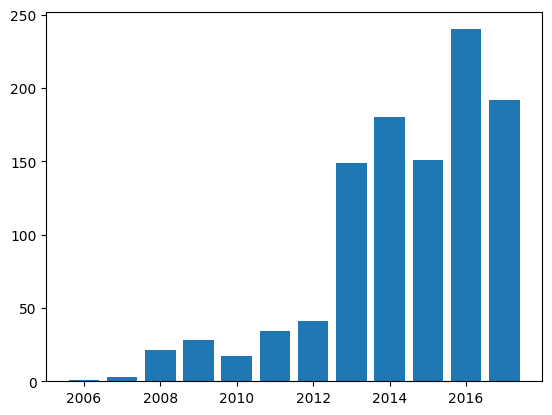

In [27]:
plt.bar(eur.index, eur)

<BarContainer object of 10 artists>

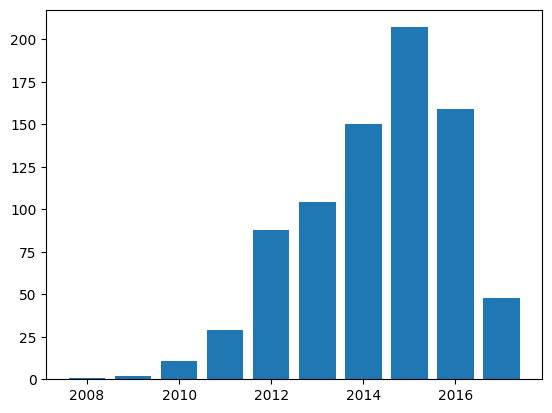

In [28]:
plt.bar(can.index, can)

## Analysis of the vocabolary employed to describe glutenfree beers

In [29]:
text=glutenfree.groupby('year')['text'].sum()
text

year
2006     (swing top bottle) Clear yellow coloured effe...
2007     33 cL bottle. Pours hazy orange with almost n...
2008     Bottle. Pale golden colour with a white head....
2009     0,33 l bottle. Pale golden body with a medium...
2010     473mL can from my local Lickbow. Labelled as ...
2011     A lightly hazed blonde with a thin white head...
2012     [5016-20121217] 750mL bottle. Fruity hops and...
2013     BiÃ¨re cuivrÃ©e. Nez houblon-caramel. En bouc...
2014     En fouillant dans mes carnets, je suis retomb...
2015     A golden beer with a thin white head. In arom...
2016     Drank at Home: Eat To Live cafe. Floral hop n...
2017     The pepper and yeast is good, but this isnâ...
Name: text, dtype: object

In [30]:
import spacy
from wordcloud import WordCloud
# Load the English language model
nlp = spacy.load('en_core_web_sm')


ModuleNotFoundError: No module named 'spacy'

In [31]:
for i in range(2006,2017):
    data=text.get(i, '')
    doc = nlp(data)
    
    cleaned_tokens = [token.text.strip() for token in doc if not (token.is_stop or token.is_punct or token.text.isspace())]
    word_freq = Counter(cleaned_tokens)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'year = {i}')
    plt.axis("off")
    plt.show()

NameError: name 'nlp' is not defined

In [ ]:
data=text.get(2006, '')
doc = nlp(data)
    
cleaned_tokens = [token.text.strip() for token in doc if not (token.is_stop or token.is_punct or token.text.isspace())]
word_freq = Counter(cleaned_tokens)
dim=len(cleaned_tokens)
subset = {key: counter for key, counter in word_freq.items() if counter >= 2}
word=pd.DataFrame([subset])/dim

for i in range(2007,2017):
    data=text.get(i, '')
    doc = nlp(data)
        
    cleaned_tokens = [token.text.strip() for token in doc if not (token.is_stop or token.is_punct or token.text.isspace())]
    word_freq = Counter(cleaned_tokens)
    dim=len(cleaned_tokens)
    subset = {key: counter for key, counter in word_freq.items() if counter >= 2}
    w=pd.DataFrame([subset])/dim
    word = pd.concat([word, w], ignore_index=True)
    
word

In [69]:
each_year=word.T
each_year['na']=each_year.isna().sum(axis=1)
each_year['na']

coloured     1
sized        5
white        0
head         0
slightly     3
            ..
Aldi        10
3.5         10
Rick        10
gingery     10
301216      10
Name: na, Length: 4704, dtype: int64

In [71]:
interest=each_year[each_year['na']<3]
interest

,0,1,2,3,4,5,6,7,8,9,10,na
coloured,0.015625,0.007812,0.002947,0.003106,NaN,0.000551,0.000139,0.000461,0.000652,0.000247,0.000391,1
white,0.023438,0.015625,0.024558,0.020186,0.017313,0.011301,0.012733,0.013486,0.012550,0.011878,0.010925,0
head,0.023438,0.019531,0.028487,0.027950,0.023881,0.015711,0.017743,0.017690,0.016004,0.014099,0.014904,0
tart,0.015625,NaN,0.001965,NaN,0.001791,0.000551,0.000626,0.000410,0.000614,0.000458,0.000522,2
taste,0.023438,0.011719,0.007859,0.001553,0.003582,0.004135,0.004036,0.004307,0.005181,0.003736,0.003294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
average,NaN,NaN,0.001965,0.003106,0.002388,0.001103,0.001809,0.001641,0.001535,0.001727,0.001207,2
Pours,NaN,NaN,0.002947,0.001553,0.007164,0.002481,0.006540,0.006051,0.003915,0.003736,0.003881,2
rice,NaN,NaN,0.005894,0.008540,0.001194,0.001654,0.000557,0.000769,0.000499,0.000211,0.000065,2
lasting,NaN,NaN,0.001965,0.001553,0.001194,0.000551,0.000487,0.001179,0.000576,0.000740,0.000913,2


In [87]:
interest['std']=interest.std(axis=1)
wanted=interest[interest['std']>0.6]
wanted.sort_values(by='std', ascending=False)
wanted.T

/var/folders/1w/gbgmz4_d1xvbs2vr70pn6tgh0000gn/T/ipykernel_4370/230142763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest['std']=interest.std(axis=1)


,tart,Iâve,orange,citric,Gluten,brew,Bottled,sweetish,gold,Bottle,...,dry,flavor,hazy,grainy,Clear,average,Pours,rice,lasting,watery
0,0.015625,0.015625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.007812,0.007812,0.011719,0.011719,0.007812,0.007812,0.007812,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.001965,NaN,NaN,0.001965,NaN,NaN,0.003929,0.001965,NaN,0.007859,...,0.003929,0.001965,0.001965,0.004912,0.003929,0.001965,0.002947,0.005894,0.001965,0.002947
3,NaN,0.002329,0.003106,NaN,0.001553,0.002329,0.004658,0.003882,0.001553,0.013199,...,0.003106,0.007764,0.004658,0.002329,0.008540,0.003106,0.001553,0.008540,0.001553,0.004658
4,0.001791,0.003582,0.005970,0.001194,0.003582,0.001194,0.002985,NaN,0.004179,0.009552,...,0.002985,0.006567,0.002388,0.002388,0.002985,0.002388,0.007164,0.001194,0.001194,0.001194
5,0.000551,0.001378,0.002481,0.000551,0.001654,0.000551,NaN,0.000827,0.001103,0.006615,...,0.005237,0.003032,0.001378,0.002205,0.002205,0.001103,0.002481,0.001654,0.000551,0.002756
6,0.000626,0.001948,0.002853,0.000209,0.000905,0.001739,0.000278,0.000348,0.001809,0.005845,...,0.003409,0.006123,0.001600,0.002366,0.001809,0.001809,0.006540,0.000557,0.000487,0.000974
7,0.000410,0.001333,0.003794,0.000564,0.001128,0.001179,0.000513,0.000308,0.001590,0.007230,...,0.002718,0.004051,0.002666,0.002051,0.002718,0.001641,0.006051,0.000769,0.001179,0.001384
8,0.000614,0.001151,0.002802,0.000230,0.000883,0.001190,0.000499,0.000230,0.001382,0.005949,...,0.003492,0.003800,0.002264,0.002648,0.002303,0.001535,0.003915,0.000499,0.000576,0.001689
9,0.000458,0.000670,0.003489,0.000317,0.000388,0.000740,0.000282,0.000282,0.001445,0.005287,...,0.002644,0.002397,0.002996,0.002326,0.001939,0.001727,0.003736,0.000211,0.000740,0.001163


In [96]:
wanted.T.columns

Index(['tart', 'Iâve', 'orange', 'citric', 'Gluten', 'brew', 'Bottled',
       'sweetish', 'gold', 'Bottle', 'colour', 'Aroma', 'Flavour', 'small',
       'aroma', 'nice', 'grassy', 'hops', 'bodied', 'bitterness', 'moderate',
       'bit', 'bad', 'tasting', 'Light', 'thin', 'hop', 'color', 'strange',
       'malts', 'sweet', 'medium', 'caramel', 'mouthfeel', 'good', 'foamy',
       'lacing', 'herbal', 'juice', 'palate', 'Sweet', 'touch', 'carbonation',
       'Flavor', 'dry', 'flavor', 'hazy', 'grainy', 'Clear', 'average',
       'Pours', 'rice', 'lasting', 'watery'],
      dtype='object')

In [89]:
wanted.T['strange']

0           NaN
1           NaN
2      0.002947
3      0.004658
4      0.001194
5      0.002756
6      0.000626
7      0.000769
8      0.000384
9      0.000317
10     0.000391
na     2.000000
std    0.612194
Name: strange, dtype: float64

In [90]:
wanted.T['Sweet']

0           NaN
1           NaN
2      0.005894
3      0.002329
4      0.004179
5      0.000827
6      0.000835
7      0.001179
8      0.001036
9      0.000740
10     0.001141
na     2.000000
std    0.612024
Name: Sweet, dtype: float64

In [91]:
wanted.T['bad']

0           NaN
1           NaN
2      0.004912
3      0.003106
4      0.002388
5      0.002205
6      0.002505
7      0.002615
8      0.002456
9      0.001621
10     0.001076
na     2.000000
std    0.611828
Name: bad, dtype: float64

In [98]:
new=each_year[each_year['na']==10]
new

,0,1,2,3,4,5,6,7,8,9,10,na
blueberry,0.015625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
Extremely,NaN,0.007812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
mouldy,NaN,NaN,0.001965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
fudge,NaN,NaN,0.001965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
Riedenburger,NaN,NaN,0.001965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...
Aldi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000196,10
3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000065,10
Rick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000065,10
gingery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000065,10


In [102]:
new.index

Index(['blueberry', 'Extremely', 'mouldy', 'fudge', 'Riedenburger',
       'Glutenfrei', 'KimJohansen', 'faroeviking', 'head.aroma', 'ash',
       ...
       'besÃ¸k', 'Stavern', '19', 'Okt', '3,5', 'Aldi', '3.5', 'Rick',
       'gingery', '301216'],
      dtype='object', length=2373)

In [38]:

beers=pd.read_csv('beers.csv')
breweries=pd.read_csv('breweries.csv')


## Diversity of beer style 

<Axes: xlabel='style'>

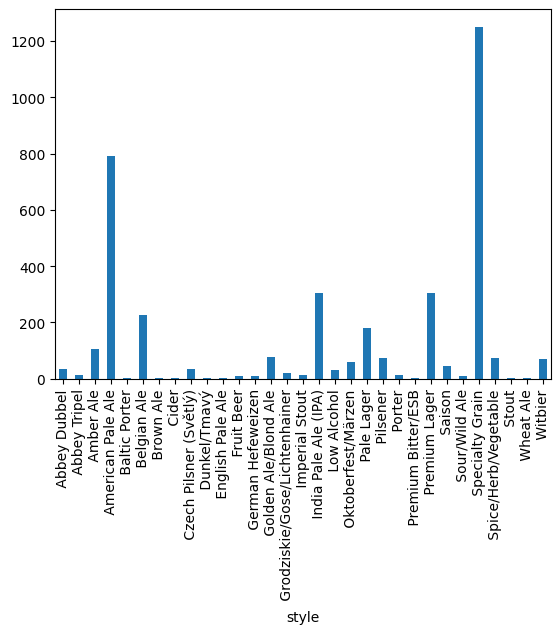

In [32]:
import matplotlib.pyplot as plt
glutenfree_style=glutenfree.groupby('style')['beer_name'].count()
glutenfree_style.plot(kind='bar')

In [35]:
glutenfree_style

style
 Abbey Dubbel                       34
 Abbey Tripel                       12
 Amber Ale                         106
 American Pale Ale                 792
 Baltic Porter                       2
 Belgian Ale                       228
 Brown Ale                           1
 Cider                               1
 Czech Pilsner (Světlý)             36
 Dunkel/Tmavý                        2
 English Pale Ale                    1
 Fruit Beer                          8
 German Hefeweizen                  10
 Golden Ale/Blond Ale               76
 Grodziskie/Gose/Lichtenhainer      22
 Imperial Stout                     14
 India Pale Ale (IPA)              305
 Low Alcohol                        32
 Oktoberfest/Märzen                 61
 Pale Lager                        180
 Pilsener                           74
 Porter                             13
 Premium Bitter/ESB                  3
 Premium Lager                     304
 Saison                             45
 Sour/Wild Ale     

In [39]:
total_style=beers.groupby('style')['beer_name'].count()
total_style

style
Abbey Dubbel                3004
Abbey Tripel                3905
Abt/Quadrupel               1565
Altbier                     2094
Amber Ale                  11664
                           ...  
Traditional Ale             1894
Weizen Bock                 1586
Wheat Ale                   7234
Witbier                     6514
Zwickel/Keller/Landbier     2703
Name: beer_name, Length: 94, dtype: int64

In [40]:
nb_style_beer=len(total_style)

In [41]:
print(f'It exists {len(glutenfree_style)} different styles of beer among gluten-free beers.')
print(f'In the entire dataset, we count {nb_style_beer} different styles of beer.')



It exists 31 different styles of beer among gluten-free beers.
In the entire dataset, we count 94 different styles of beer.


In [44]:
print(f'percentage of gluten_free beers : {len(glutenfree.index)/len(beers.index)*100}')

percentage of gluten_free beers : 0.8527848968854125


## Does glutenfree beers are more appreciated than other beers?
We will keep users that evaluated a similar number of glutenfree beer and non glutenfree beers to compare the grades between glutenfree and non glutenfree_beer


In [1]:
with open('ratings.txt', 'r') as file:
    user_id=[line.strip() for i,line in enumerate(file) if i % 17 ==8]
    

In [2]:
user_id[1:10]

['user_id: 442761',
 'user_id: 288889',
 'user_id: 250510',
 'user_id: 122778',
 'user_id: 227834',
 'user_id: 83106',
 'user_id: 175852',
 'user_id: 37316',
 'user_id: 75452']

In [3]:
users_id=[int(id.split(' ',2)[1]) for id in user_id]
users_id[1:10]

[442761, 288889, 250510, 122778, 227834, 83106, 175852, 37316, 75452]

In [4]:
import pandas as pd
import numpy as np
glutenfree=pd.read_csv('glutenfree.csv')
microbreweries=pd.read_csv('micro-breweries.csv')
users=pd.read_csv('users.csv')

In [22]:
nb_ratings=glutenfree.groupby('user_id')['user_name'].count()
nb_ratings=pd.DataFrame(nb_ratings)
nb_ratings.rename(columns={'user_name':'nb_ratings_glutenfree'}, inplace=True)
nb_ratings

,nb_ratings_glutenfree
user_id,
39,1
181,8
195,5
272,2
418,3
...,...
467194,1
468181,1
470674,1


In [25]:
users_ratings=users[['nbr_ratings', 'user_id']]
users_ratings.set_index('user_id', inplace=True)
users_ratings

,nbr_ratings
user_id,
175852,1890
442761,89
288889,169
250510,3371
122778,13043
...,...
134893,1
327816,1
183139,1


In [28]:
gluten_users=pd.merge(users_ratings,nb_ratings, how='right', on='user_id')
gluten_users

,nbr_ratings,nb_ratings_glutenfree
user_id,,
39,2434,1
181,11810,8
195,16396,5
272,206,2
418,448,3
...,...,...
467194,840,1
468181,1,1
470674,107,1


In [49]:
keep=gluten_users[(gluten_users['nbr_ratings']<=3*gluten_users['nb_ratings_glutenfree'])& (gluten_users['nbr_ratings']>gluten_users['nb_ratings_glutenfree'])]
keep

,nbr_ratings,nb_ratings_glutenfree
user_id,,
216128,3,1
271958,2,1
272889,3,1
280325,2,1
308638,2,1
319846,2,1
348288,2,1
361822,2,1
366688,12,7


In [50]:
keep['nbr_ratings'].sum()

35

In [51]:
keep['nb_ratings_glutenfree'].sum()

17

In [53]:
positions_gluten = np.where(np.isin(users_id, keep.index.to_numpy()))[0]


In [62]:
positions_gluten[1:10]

array([ 260005,  383749,  809029,  886266, 1133201, 1133281, 1156971,
       1317255, 1579458])

In [64]:
len(positions_gluten)

35

In [66]:
positions_gluten*=17
lines_to_keep_gluten=[]
for i in range(17):
    lines_to_keep_gluten+=[element + i for element in positions_gluten]
lines_to_keep_gluten.sort()
lines_to_keep_gluten[1:10]

[2454767,
 2454768,
 2454769,
 2454770,
 2454771,
 2454772,
 2454773,
 2454774,
 2454775]

In [67]:
input_file_path = 'ratings.txt'
output_file_path = 'glutenfree_users.txt'

import linecache
with  open(output_file_path, 'w') as output_file:
    for line_number in lines_to_keep_gluten:
        line = linecache.getline(input_file_path, line_number)
        output_file.write(line)
# Close the output file
output_file.close()

In [3]:
import pandas as pd
columns_name = ['beer_name', 'beer_id', 'brewery_name', 'brewery_id',
                'style', 'abv', 'date', 'user_name', 'user_id', 'appearance',
                'aroma', 'palate', 'taste', 'overall', 'rating', 'text']

# Create an empty DataFrame with the specified column names
df = pd.DataFrame(columns=columns_name)

with open('glutenfree_users.txt', 'r') as file:
    data = {}
    for i, line in enumerate(file):
        if i % 17 == 0:
            # This is the last line of a group, so add the data to the DataFrame
            #df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)
            df = df._append(data, ignore_index=True)
            data = {}
        else:
            #print(line)
            # Split the line at the first ':' and assign the values to the corresponding column
            key, value = line.strip().split(':', 1)
            data[columns_name[i % 17 - 1]] = value

In [4]:
df

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Glutenberg Solérone dAutomne 2014,289763,Glutenberg Brewing Company,13241,Spice/Herb/Vegetable,7.9,1418382000,assapples,348288,1,3,1,3,7,1.50,"Aroma: bit of toast, sherry, acetoneAppearanc..."
2,Minhas Lazy Mutt Gluten Free,217362,Minhas Micro Brewery - Calgary,17638,Specialty Grain,4.7,1380708000,toorudez,271958,1,1,1,1,1,0.50,I tried to buy this and the store clerk told ...
3,Nickel Brook Bull Eye Gluten Free Pale Ale,123211,Nickel Brook Brewing Co.,5641,American Pale Ale,6.0,1375696800,PivoKossack,272889,3,3,2,3,6,1.70,My wife is on a Gluten Free kick right now an...
4,To Øl Hop Love Pils (Gluten Free),311612,To Øl,12119,Pilsener,4.5,1426417200,willycoolj,361822,4,9,4,8,17,4.20,"Hop Love Pils, cloudy,citrus aroma, very nice..."
5,Becks,703,Brauerei Beck & Co./Becks (InBev),112,Premium Lager,4.8,1486897200,Ozangunay,448861,4,3,2,3,7,1.90,"As it is in German lager, too much bitterness..."
6,Neumarkter Lammsbräu Glutenfrei,88039,Neumarkter Lammsbräu,1704,Specialty Grain,4.7,1429524000,GIKate,366688,4,6,4,6,5,2.50,"Cereal aroma. Golden, clear, minimal head. Li..."
7,Neumarkter Lammsbräu Glutenfrei Alkoholfrei,166776,Neumarkter Lammsbräu,1704,Low Alcohol,nan,1429524000,GIKate,366688,4,3,3,3,5,1.80,Itâs just not good at all. It looks like be...
8,Paulaner Salvator,649,Paulaner Brauerei &#40;Schörghuber&#41;,61,Doppelbock,7.9,1358074800,ajhawener,216128,5,10,5,10,20,5.00,One of the best beers Iâve tasted. Alcohol...
9,Neuzeller Lebensfreude Glutenfrei,112069,Klosterbrauerei Neuzelle,1380,Specialty Grain,5.0,1486897200,Ozangunay,448861,1,1,1,2,1,0.60,"Aroma is cooked vegetables, soy sauce. Appear..."


In [7]:
csv_file_path = 'glutenfree_users.csv'  
df.to_csv(csv_file_path, index=False) 

In [1]:
users_glutenfree=pd.read_csv('glutenfree_users.csv')

Let's first analyse if glutenfree beers are more appreciated than beers with gluten

In [2]:
users_glutenfree['glutenfree']=users_glutenfree['beer_name'].str.contains('gluten', case=False, na=False)
users_glutenfree.dropna(inplace=True)  
users_glutenfree

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,year,month,glutenfree
1,Glutenberg Solérone dAutomne 2014,289763.0,Glutenberg Brewing Company,13241.0,Spice/Herb/Vegetable,7.9,1.418382e+09,assapples,348288.0,1.0,3.0,1.0,3.0,7.0,1.5,"Aroma: bit of toast, sherry, acetoneAppearanc...",2014.0,12.0,True
2,Minhas Lazy Mutt Gluten Free,217362.0,Minhas Micro Brewery - Calgary,17638.0,Specialty Grain,4.7,1.380708e+09,toorudez,271958.0,1.0,1.0,1.0,1.0,1.0,0.5,I tried to buy this and the store clerk told ...,2013.0,10.0,True
3,Nickel Brook Bull Eye Gluten Free Pale Ale,123211.0,Nickel Brook Brewing Co.,5641.0,American Pale Ale,6.0,1.375697e+09,PivoKossack,272889.0,3.0,3.0,2.0,3.0,6.0,1.7,My wife is on a Gluten Free kick right now an...,2013.0,8.0,True
4,To Øl Hop Love Pils (Gluten Free),311612.0,To Øl,12119.0,Pilsener,4.5,1.426417e+09,willycoolj,361822.0,4.0,9.0,4.0,8.0,17.0,4.2,"Hop Love Pils, cloudy,citrus aroma, very nice...",2015.0,3.0,True
5,Becks,703.0,Brauerei Beck & Co./Becks (InBev),112.0,Premium Lager,4.8,1.486897e+09,Ozangunay,448861.0,4.0,3.0,2.0,3.0,7.0,1.9,"As it is in German lager, too much bitterness...",2017.0,2.0,False
6,Neumarkter Lammsbräu Glutenfrei,88039.0,Neumarkter Lammsbräu,1704.0,Specialty Grain,4.7,1.429524e+09,GIKate,366688.0,4.0,6.0,4.0,6.0,5.0,2.5,"Cereal aroma. Golden, clear, minimal head. Li...",2015.0,4.0,True
7,Neumarkter Lammsbräu Glutenfrei Alkoholfrei,166776.0,Neumarkter Lammsbräu,1704.0,Low Alcohol,nan,1.429524e+09,GIKate,366688.0,4.0,3.0,3.0,3.0,5.0,1.8,Itâs just not good at all. It looks like be...,2015.0,4.0,True
8,Paulaner Salvator,649.0,Paulaner Brauerei &#40;Schörghuber&#41;,61.0,Doppelbock,7.9,1.358075e+09,ajhawener,216128.0,5.0,10.0,5.0,10.0,20.0,5.0,One of the best beers Iâve tasted. Alcohol...,2013.0,1.0,False
9,Neuzeller Lebensfreude Glutenfrei,112069.0,Klosterbrauerei Neuzelle,1380.0,Specialty Grain,5.0,1.486897e+09,Ozangunay,448861.0,1.0,1.0,1.0,2.0,1.0,0.6,"Aroma is cooked vegetables, soy sauce. Appear...",2017.0,2.0,True
10,Estrella Damm Daura (Apta Para Celíacos),93930.0,Damm,1378.0,Pale Lager,5.4,1.429524e+09,GIKate,366688.0,4.0,5.0,3.0,5.0,8.0,2.5,"Mild aroma, golden color with minimal white h...",2015.0,4.0,False


In [3]:
users_glutenfree['glutenfree']

1      True
2      True
3      True
4      True
5     False
6      True
7      True
8     False
9      True
10    False
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18     True
19    False
20     True
21     True
22     True
23     True
24    False
25    False
26    False
27    False
28    False
29     True
30     True
31     True
32     True
33    False
34    False
Name: glutenfree, dtype: bool

In [4]:
users_glutenfree['glutenfree'].sum()

17

In [5]:
glutenfree=users_glutenfree[users_glutenfree['glutenfree']]
gluten=users_glutenfree[~users_glutenfree['glutenfree']]
gluten

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,year,month,glutenfree
5,Becks,703.0,Brauerei Beck & Co./Becks (InBev),112.0,Premium Lager,4.8,1.486897e+09,Ozangunay,448861.0,4.0,3.0,2.0,3.0,7.0,1.9,"As it is in German lager, too much bitterness...",2017.0,2.0,False
8,Paulaner Salvator,649.0,Paulaner Brauerei &#40;Schörghuber&#41;,61.0,Doppelbock,7.9,1.358075e+09,ajhawener,216128.0,5.0,10.0,5.0,10.0,20.0,5.0,One of the best beers Iâve tasted. Alcohol...,2013.0,1.0,False
10,Estrella Damm Daura (Apta Para Celíacos),93930.0,Damm,1378.0,Pale Lager,5.4,1.429524e+09,GIKate,366688.0,4.0,5.0,3.0,5.0,8.0,2.5,"Mild aroma, golden color with minimal white h...",2015.0,4.0,False
11,Gösser Beer (Export),9516.0,Gösser (Brau Union),1592.0,Pale Lager,5.2,1.375956e+09,PivoKossack,272889.0,4.0,6.0,3.0,7.0,7.0,2.7,"Donât know if itâs Austriaâs finest, bu...",2013.0,8.0,False
12,Kaiser Premium (Austria),9251.0,Wieselburger Brauerei (Brau Union),563.0,Pilsener,5.4,1.378116e+09,PivoKossack,272889.0,3.0,6.0,4.0,7.0,7.0,2.7,"Nother a bad beer, but nothing spectacular ei...",2013.0,9.0,False
13,atec Celia,134459.0,atecký Pivovar (Carlsberg),2444.0,Czech Pilsner (Světlý),4.5,1.429524e+09,GIKate,366688.0,4.0,7.0,3.0,7.0,14.0,3.5,"Malty, herbs, golden, clear, white head. Medi...",2015.0,4.0,False
14,atec Celia Dark,278794.0,atecký Pivovar (Carlsberg),2444.0,Dunkel/Tmavý,5.7,1.429524e+09,GIKate,366688.0,4.0,8.0,3.0,8.0,14.0,3.7,"Caramel, coffe and cereal, brown color, clear...",2015.0,4.0,False
16,Lakefront New Grist Pilsner,51707.0,Lakefront Brewery,156.0,Pilsener,5.0,1.404209e+09,jerryforgfbeer,308638.0,4.0,7.0,4.0,8.0,17.0,4.0,"One of the best ""gluten-free"" I have tasted. ...",2014.0,7.0,False
17,North Coast Old Rasputin Russian Imperial Stout,680.0,North Coast Brewing Company,108.0,Imperial Stout,9.0,1.379758e+09,MikeAWalters,280325.0,4.0,7.0,5.0,9.0,17.0,4.2,I love this beer. A bit of a bite to it. Fini...,2013.0,9.0,False
19,NoCoast Low Brow Brown Ale,461492.0,NoCoast Beer Company,29184.0,Brown Ale,4.0,1.498385e+09,rgor88,477448.0,2.0,1.0,2.0,1.0,2.0,0.8,i found this beer to lack a palatable flavor....,2017.0,6.0,False


In [6]:
glu=gluten[['appearance','aroma','palate','taste', 'overall','rating']]
freeglu=glutenfree[['appearance','aroma','palate','taste', 'overall','rating']]

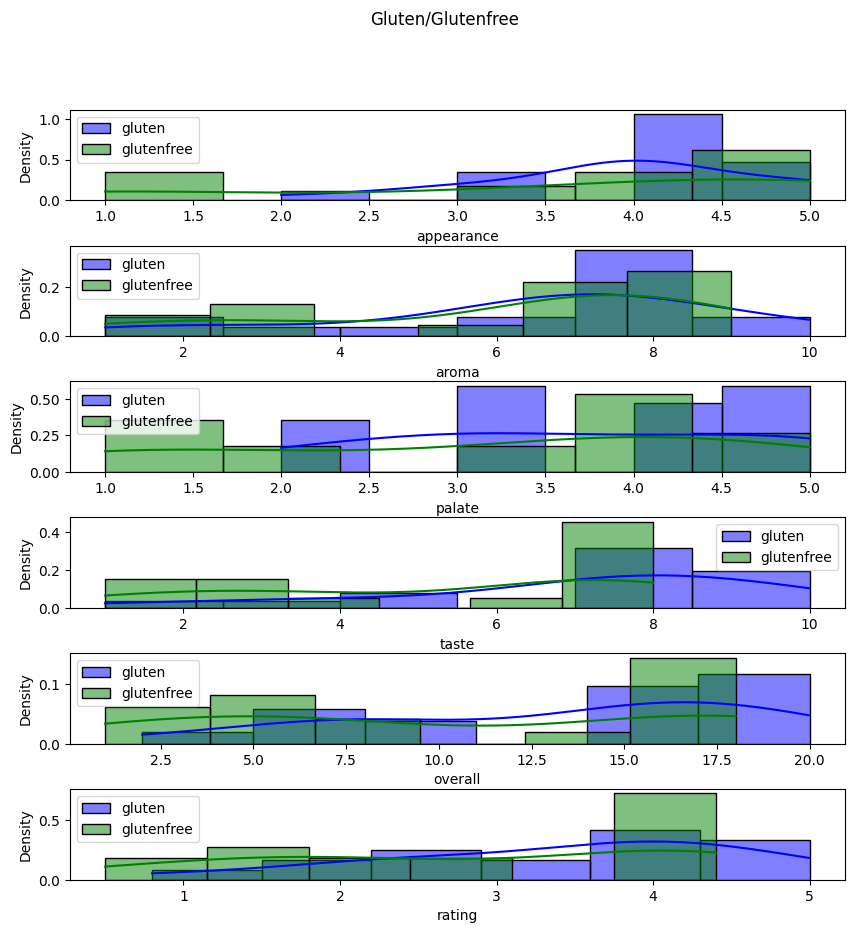

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(len(glu.columns), figsize=(10,10))
fig.suptitle('Gluten/Glutenfree')

for i,column in enumerate(glu.columns):
    sns.histplot(glu[column].dropna(), stat='density', kde=True, color='blue', label='gluten', ax=axs[i])
    sns.histplot(freeglu[column].dropna(), stat='density', kde=True, color='green', label='glutenfree', ax=axs[i])
    #axs[i].set_title(column)
    axs[i].legend()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [8]:
from statsmodels.stats import diagnostic
# does the data come from a normal distrbution?
diagnostic.kstest_normal(glutenfree['aroma'].values, dist = 'norm')

(0.3032546695452755, 0.0009999999999998899)

In [9]:
from scipy.stats import ttest_ind
ttest=pd.DataFrame(columns=['Topic','T_stat','P_value'])
for col in glu.columns:
    t_stat, p_value = ttest_ind(glu[col], freeglu[col])
    ttest.loc[len(ttest)]={'Topic':col,'T_stat':t_stat,'P_value':p_value}
ttest

,Topic,T_stat,P_value
0,appearance,0.799113,0.430117
1,aroma,0.600835,0.552182
2,palate,1.170461,0.250459
3,taste,2.015739,0.052289
4,overall,1.303671,0.201647
5,rating,1.340116,0.189646


Glutenfree beers seem to affect the taste!

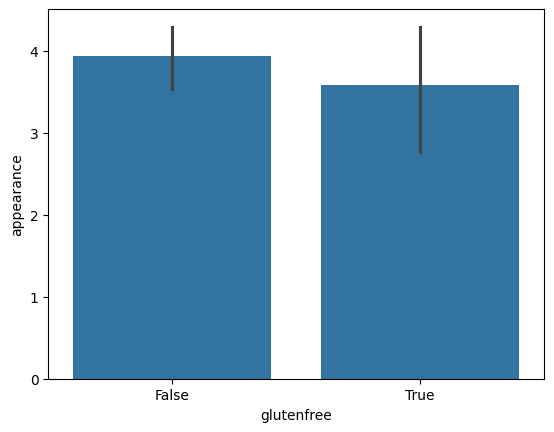

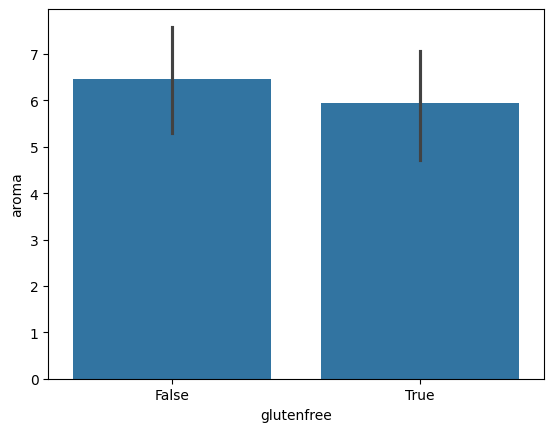

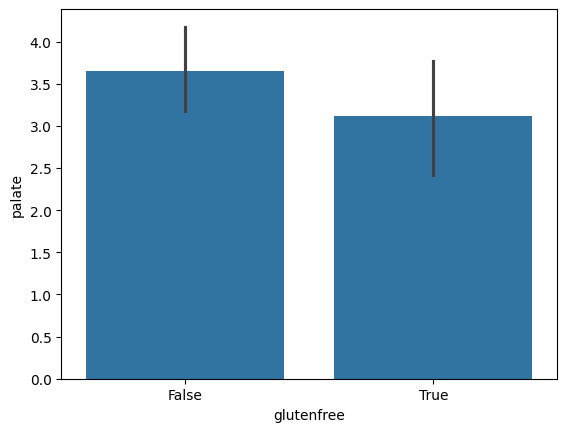

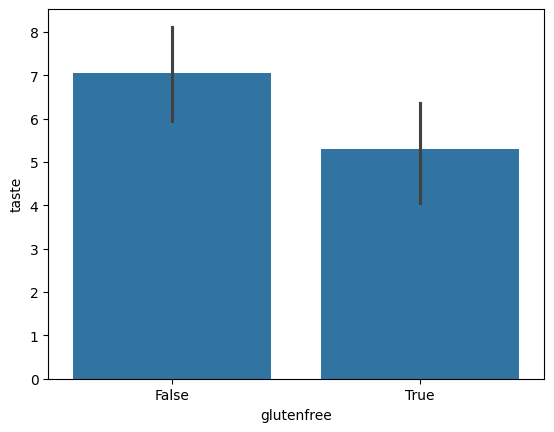

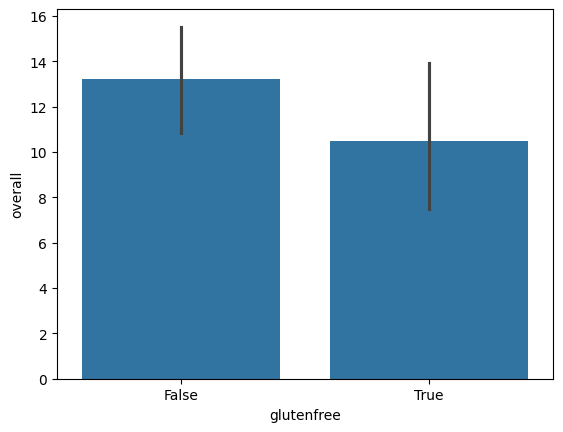

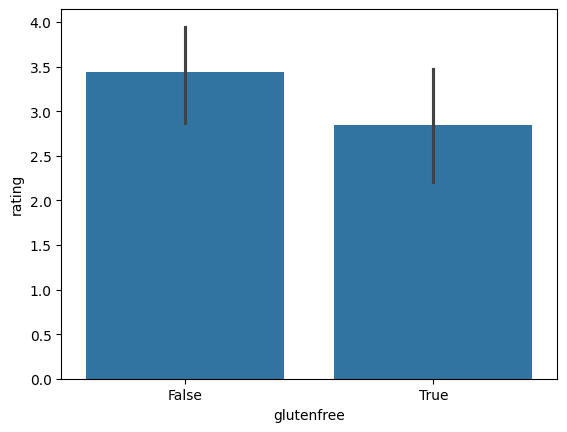

In [10]:
for col in glu.columns:
    sns.barplot(x="glutenfree", y=col, data=users_glutenfree, )
    plt.show()

The taste seems to be the most affected parameter (negative impact)

Since the data is not normally distributed, I propose to do mannwhitneyu test to complete the t-test

In [11]:
from scipy.stats import mannwhitneyu

correlations=pd.DataFrame(columns=['topic','statistic','pvalue'])

for column in glu.columns:
    x = glu[column]
    y = freeglu[column]

    # Perform the Mann-Whitney U test
    statistic, p_value = mannwhitneyu(x, y)

    correlations.loc[len(correlations)] = {'topic': column, 'statistic': statistic, 'pvalue': p_value}

print(correlations)


        topic  statistic    pvalue
0  appearance      145.0  1.000000
1       aroma      153.0  0.777806
2      palate      171.5  0.348733
3       taste      206.0  0.032520
4     overall      179.0  0.238567
5      rating      177.5  0.262233


There is significant difference between gluten and glutenfree beers in terms of taste!

In [12]:
users_glutenfree['glutenfree']=users_glutenfree['glutenfree'].astype(int)

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
mod = smf.ols(formula='rating ~ appearance + aroma + palate+ taste + overall+C(glutenfree)', data=users_glutenfree)
np.random.seed(2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.926e+30
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:52:28   Log-Likelihood:                 1124.8
No. Observations:                  34   AIC:                            -2236.
Df Residuals:                      27   BIC:                            -2225.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.106e-16   7.52

In [14]:
mod = smf.ols(formula='rating ~ appearance + aroma + palate+ taste + overall', data=users_glutenfree)
np.random.seed(2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.791e+30
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:52:28   Log-Likelihood:                 1098.1
No. Observations:                  34   AIC:                            -2184.
Df Residuals:                      28   BIC:                            -2175.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.638e-15   1.48e-15     -1.107      0.2

The aroma, palate, taste and overall are very correlated with the rating as expected!
By adding information about the presence or absence of gluten, we don't explain much more the outcome!

In [34]:
mod = smf.ols(formula='taste ~ C(glutenfree)', data=users_glutenfree)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  taste   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     4.063
Date:                Sun, 12 Nov 2023   Prob (F-statistic):             0.0523
Time:                        18:57:44   Log-Likelihood:                -79.072
No. Observations:                  34   AIC:                             162.1
Df Residuals:                      32   BIC:                             165.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.0588      0

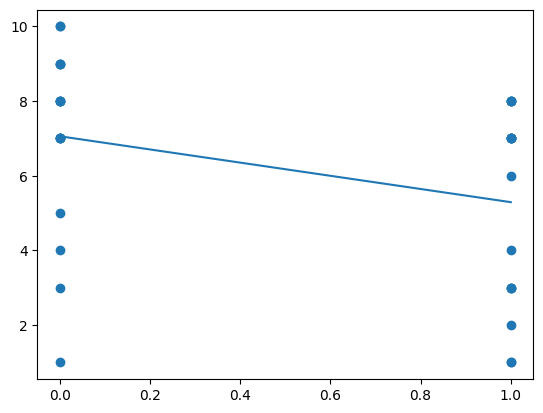

In [36]:
plt.scatter(users_glutenfree['glutenfree'],users_glutenfree['taste'])
b=res.params.values[0]
a=res.params.values[1]
x=np.linspace(0,1,30)
plt.plot(x, a*x+b)

<Axes: xlabel='glutenfree', ylabel='taste'>

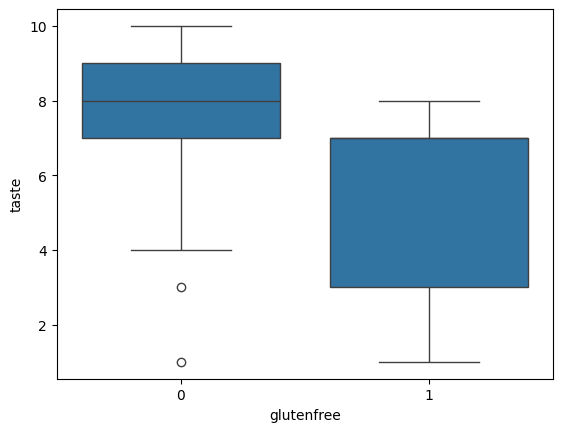

In [39]:
sns.boxplot(x="glutenfree", y="taste", data=users_glutenfree)

In [19]:
norm=pd.DataFrame()
# how we standardize the countinuous variables

norm['appearance'] = (users_glutenfree['appearance'] - users_glutenfree['appearance'].mean())/users_glutenfree['appearance'].std()
norm['taste'] = (users_glutenfree['taste'] - users_glutenfree['taste'].mean())/users_glutenfree['taste'].std()
norm['palate'] = (users_glutenfree['palate'] - users_glutenfree['palate'].mean())/users_glutenfree['palate'].std()
norm['aroma'] = (users_glutenfree['aroma'] - users_glutenfree['aroma'].mean())/users_glutenfree['aroma'].std()
norm['overall'] = (users_glutenfree['overall'] - users_glutenfree['overall'].mean())/users_glutenfree['overall'].std()
norm['rating'] = (users_glutenfree['rating'] - users_glutenfree['rating'].mean())/users_glutenfree['rating'].std()
norm['glutenfree']=users_glutenfree['glutenfree']

In [20]:
norm

,appearance,taste,palate,aroma,overall,rating,glutenfree
1,-2.158920,-1.190480,-1.796549,-1.260218,-0.776711,-1.252454,1
2,-2.158920,-1.940042,-1.796549,-2.046410,-1.737008,-2.016968,1
3,-0.597148,-1.190480,-1.042442,-1.260218,-0.936761,-1.099551,1
4,0.183738,0.683424,0.465772,1.098355,0.823784,0.811734,1
5,0.183738,-1.190480,-1.042442,-1.260218,-0.776711,-0.946648,0
6,0.183738,-0.066138,0.465772,-0.080931,-1.096810,-0.487940,1
7,0.183738,-1.190480,-0.288335,-1.260218,-1.096810,-1.023100,1
8,0.964624,1.432986,1.219879,1.491451,1.303933,1.423345,0
9,-2.158920,-1.565261,-1.796549,-2.046410,-1.737008,-1.940516,1
10,0.183738,-0.440919,-0.288335,-0.474027,-0.616661,-0.487940,0


In [21]:
# logistic regression to predict if the beer is glutenfree given ratings

mod = smf.logit(formula='glutenfree~  appearance+ taste + palate + \
                        aroma + overall', data=norm)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.450941
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             glutenfree   No. Observations:                   34
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            5
Date:                Sun, 12 Nov 2023   Pseudo R-squ.:                  0.3494
Time:                        18:52:29   Log-Likelihood:                -15.332
converged:                       True   LL-Null:                       -23.567
Covariance Type:            nonrobust   LLR p-value:                  0.005623
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5219      0.520      1.003      0.316      -0.498       1.541
appearance    -0.8577      1.

In [22]:
mod = smf.logit(formula='glutenfree~ taste + aroma ', data=norm)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.477836
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             glutenfree   No. Observations:                   34
Model:                          Logit   Df Residuals:                       31
Method:                           MLE   Df Model:                            2
Date:                Sun, 12 Nov 2023   Pseudo R-squ.:                  0.3106
Time:                        18:52:29   Log-Likelihood:                -16.246
converged:                       True   LL-Null:                       -23.567
Covariance Type:            nonrobust   LLR p-value:                 0.0006618
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4452      0.454      0.981      0.327      -0.445       1.335
taste         -6.9649      2.

Glutenfree beers seem to affect the aroma and the taste of the beer!